# Байесовский классификатор

### Цель: 
**построить модель $f(\pmb{\text{x}}) \rightarrow y$**
- $y$ один из $k$ классов
- $\pmb{\text{x}} = x_1 ... x_n$ - значения атрибутов

### Вероятностная классификация:
- наибольшая вероятность дает нам класс объекта: $ \hat{y} = arg \max_{y} P(y|\pmb{\text{x}})$

### Байесовская вероятность класса (Теорема):

$$P(y|\pmb{\text{x}}) = \frac{P(\pmb{\text{x}}|y)P(y)}{P(\pmb{\text{x}})}$$

где $P(\pmb{\text{x}}|y)$ - вероятность (likelihood) встретить объект $\pmb{\text{x}}$ c классом $y$, $P(y)$ - априорная вероятность класса $y$ и $P(\pmb{\text{x}})$ - вероятность встретить объект $\pmb{\text{x}}$ во всей выборке или в любом из $k$ классов, которая может быть выражена следующим образом:

$$P(\pmb{\text{x}}) = \sum_{j=1}^{k}P(\pmb{\text{x}}|y_j)P(y_j)$$

Отсюда вытекает следующее:

$$P(y|\pmb{\text{x}}) = \frac{P(\pmb{\text{x}}|y)P(y)}{\sum_{y'}P(\pmb{\text{x}}|y')P(y')}$$

В связи с тем, что $P(\pmb{\text{x}})$ - фиксировано для определенного объекта, то байсовское правило может быть переписано:

$$ \hat{y} = arg \max_{y_i} P(y_i|\pmb{\text{x}}) = arg \max_{y_i} \{ \frac{P(x|y_i)P(y_i)}{P(\pmb{\text{x}})} \} = arg \max_{y_i} \{ P(\pmb{\text{x}}|y_i)P(y_i) \}$$

Другими словами, предсказанный класс существенно зависит от вероятности этого класса принимая во внимание априорную вероятность этого класса.

## Оценка априорной вероятности класса 
Классификация объектов строится на оценке вероятности и априорной вероятности из тренировочного датасета $D$. Возьмем все объекты из данных $D$ и поделим на подвыборки $D_i$ для каждого класса $y_i$. Каждая подвыборка будет иметь размер $|D_i| = n_i$.
Таким образом, вероятность каждого класса будет вычислена по следующей формуле:

$$\hat P(y_i) = \frac{n_i}{n}$$,

где n_i - количество объектов в подвыборке, n - количество всех объектов в датасете.

## Оценка вероятности (likelihood)

Оценка вероятности $P(\pmb{\text{x}}|y_i)$ производится оценкой совместных вероятностей объекта $x$ через все $d$ атрибуты данных.
Необходимо вычислить $P(\pmb{\text{x}}=(x_1,x_2, ..., x_d )|y_i)$

### Численные атрибуты
Предположим, что все атрибуты численные. Проводить оценку можно параметрическими и непараметрическими методами.
В параметрических методах мы обычно предполагаем, что каждый класс $y_i$ объектов имеет нормальное распределение возле некоторого среднего $\mu_i$ и среднеквадратического отклонения $\sigma_i$.

$$f_i(\pmb{\text{x}})=f(\pmb{\text{x}}|\mu_i, \textstyle{\sum_{i}}) = \frac{1}{(\sqrt{2 \pi})^d \sqrt{|\sum_{i}|}} e^{- \frac{\pmb{(\text{x}} - \mu_i)^T \sum_{i}^{-1} (\pmb{\text{x}} - \mu_i)}{2}}$$

В связи с тем, что $y_i$ характеризуется непрерывным распределением, вероятность любой взятой точк будет равна 0. Однако, мы можем вычислить вероятность в маленьком интервале $\epsilon > 0$ с центром $x$:

$$P(\pmb{\text{x}}|y_i) = 2 \epsilon f_i(x)$$

Тогда

$$P(y_i|\pmb{\text{x}}) = \frac{2 \epsilon f_i(x)P(y_i)}{\sum_{j=1}^{k} 2 \epsilon f_j(x)P(y_j)} = \frac{f_i(x)P(y_i)}{\sum_{j=1}^{k} f_j(x)P(y_j)}$$,

где $\sum_{j=1}^{k} f_j(x)P(y_j)$ фиксированное значение для $x$, то можно предсказывать класс по следующему выражению:

$$ \hat{y} = arg \max_{y_i} \{ f_i(x)P(y_i) \}$$

Среднее значение и среднеквадратическое отклонение вычисляются по формулам:

$$\hat \mu_i = \frac{1}{n_i} \sum_{x_j \in D_i} \textstyle{x}_j$$

$$\hat{\textstyle{\sum}_{i}} = \frac{1}{n_i} \textstyle{Z}_i^T \textstyle{Z}_i$$,

где $\textstyle{Z}_i$ - центрированная матрица для класса $y_i$.

$$\textstyle{Z}_i = \textstyle{D}_i - \hat \mu_i^T$$

## Алгоритм
**BayesClassifier**($\textstyle{D}=\{ (\textstyle{x}_j, y_j)  \}_{j=1}^n$):
for $i = 1,...,k$ do
- $\textstyle{D}_i \leftarrow \{ \textstyle{x}_j | y_j=c_i, j=1,...,n \} \}$
- $n_i \leftarrow | \textstyle{D}_i |$
- $\hat P(c_i) \leftarrow \frac{n_i}{n}$
- $\hat \mu_i = \frac{1}{n_i} \sum_{\pmb{\text{x}}_j \in D_i} \pmb{\text{x}}_j$
- $\textstyle{Z}_i = \textstyle{D}_i - \hat \mu_i^T$
- $\hat{\textstyle{\sum}_{i}} = \frac{1}{n_i} \textstyle{Z}_i^T \textstyle{Z}_i$

**return** $\hat P(c_i), \hat \mu_i, \hat{\textstyle{\sum}_{i}}$ for all $i=1,...,k$


**Testing** ($\pmb{\text{x}}$ and $\hat P(c_i), \hat \mu_i, \hat{\textstyle{\sum}_{i}}$ for all $i \in [1,k]$)
- $y \leftarrow arg max_{c_i}{f(\pmb{\text{x}} | \hat \mu_i, \hat{\textstyle{\sum}_{i}})) P(c_i)}$

**return** $\hat y$

### Категориальные атрибуты


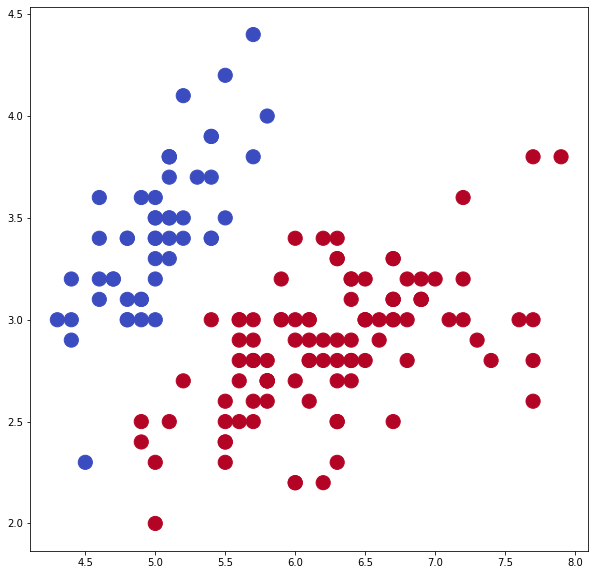

In [44]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
data = datasets.load_iris()
X = data['data']
Y = data['target']
Y[Y == 2] = 1  
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=plt.cm.coolwarm)

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

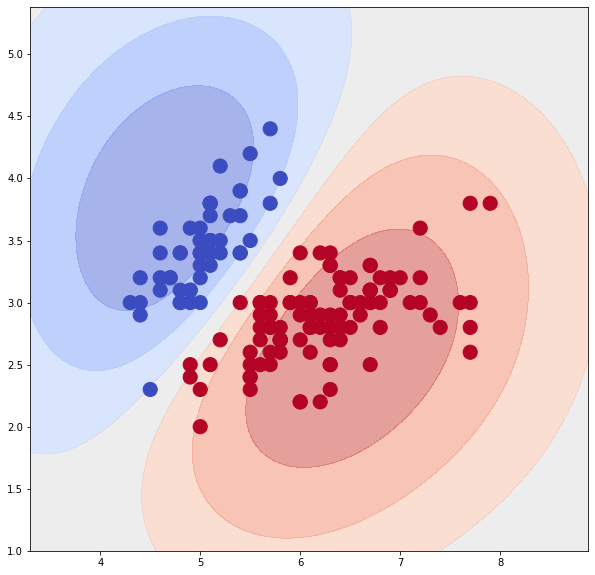

In [42]:
clf = GaussianProcessClassifier(warm_start=True)
clf.fit(X[:,:2], Y)

h = .02
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Z = Z[:,1] - Z[:,0]
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.coolwarm, alpha=.5)
plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=plt.cm.coolwarm)

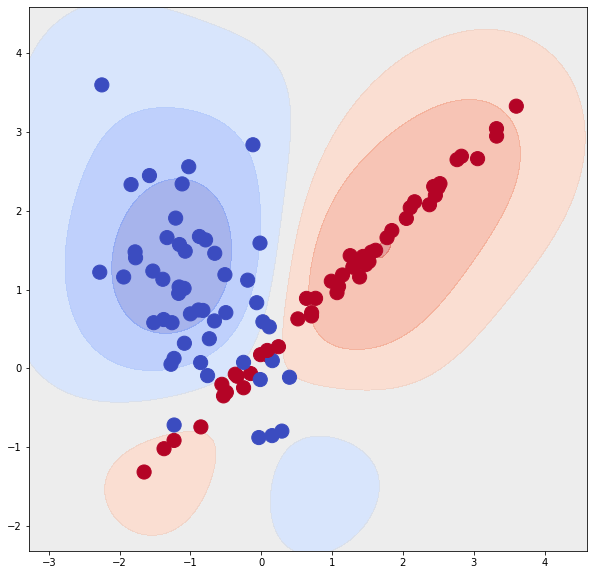

In [99]:
X, Y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, random_state=9)
# X = data['data']
# Y = data['target']

clf = GaussianProcessClassifier(warm_start=True)
clf.fit(X, Y)

h = .02
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Z = Z[:,1] - Z[:,0]
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.coolwarm, alpha=.5)
plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=plt.cm.coolwarm)

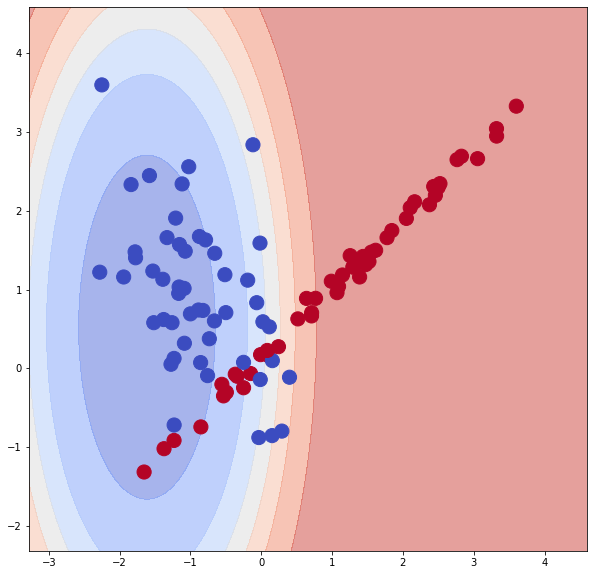

In [100]:
clf = GaussianNB()
clf.fit(X, Y)

h = .02
x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Z = Z[:,1] - Z[:,0]
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z,  cmap=plt.cm.coolwarm, alpha=.5)
plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=plt.cm.coolwarm)

In [40]:
x = np.array([[6, 4]])
cov = np.zeros(())
for i in range(2):
    n = len(Y[Y==i])
    Py = n / len(Y)
    mu = np.mean(X[:,:2][Y==i], axis=0) 
    Z = X[:,:2][Y==i] - mu
    cov = np.dot(Z.T, Z) / n
    print(1 / (np.sqrt(2 * np.pi)**2 * np.sqrt(np.linalg.det(cov))) * np.exp(- np.dot(np.dot((x - mu).T, np.linalg.inv(cov)), (x - mu)) / 2))

0.021270626499054347
6.127249309041696e-05
